# Week 10-2 RNN을 활용한 텍스트 분류 Lab

1~8번은 이전과 동일

amazon_mobile_review_result.csv 파일은 모바일 단말기에 대한 아마존 리뷰를 수집하여 전처리한 데이터이다. 이를 이용해서 다음을 수행하시오. 이를 이용해서 다음을 수행하시오.

1. 데이터파일을 읽어들여서, review_df에 저장하시오.

In [1]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df = pd.read_csv('amazon_mobile_review_result.csv')

review_df

asin               name  rating                date  verified  \
0      B0000SX2UC              Janet       3    October 11, 2005     False   
1      B0000SX2UC         Luke Wyatt       1     January 7, 2004     False   
2      B0000SX2UC             Brooke       5   December 30, 2003     False   
3      B0000SX2UC      amy m. teague       3      March 18, 2004     False   
4      B0000SX2UC      tristazbimmer       4     August 28, 2005     False   
...           ...                ...     ...                 ...       ...   
67981  B081H6STQQ              jande       5     August 16, 2019     False   
67982  B081H6STQQ            2cool4u       5  September 14, 2019     False   
67983  B081H6STQQ              simon       5       July 14, 2019     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5   December 24, 2019      True   
67985  B0825BB7SG      Owen Gonzalez       5   December 11, 2019     False   

                                                   title  \
0                            Def not best, but not worst   
1                            Text Messaging Doesn't Work   
2                                        Love This Phone   
3                                Love the Phone, BUT...!   
4           Great phone service and options, lousy case!   
...                                                  ...   
67981  Awesome Phone, but finger scanner is a big mis...   
67982                                    Simply Amazing!   
67983  great phon3, but many bugs need to fix. still ...   
67984                                  Phone is like new   
67985                    Outstanding phone for the price   

                                                    body  helpfulVotes  \
0      I had the Samsung A600 for awhile which is abs...           1.0   
1      Due to a software issue between Nokia and Spri...          17.0   
2      This is a great, reliable phone. I also purcha...           5.0   
3      I love the phone and all, because I really did...           1.0   
4      The phone has been great for every purpose it ...           1.0   
...                                                  ...           ...   
67981  I love the camera on this phone. The screen is...           1.0   
67982  I've been an Xperia user for several years and...           1.0   
67983                         buy one more for my cousin           NaN   
67984  Product looks and works like new. Very much re...           NaN   
67985  I love the size and style of this phone. It is...           NaN   

                                                  body_n  
0      ['samsung', 'awhile', 'absolute', 'doo', 'doo'...  
1      ['due', 'software', 'issue', 'nokia', 'sprint'...  
2      ['great', 'reliable', 'phone', 'also', 'purcha...  
3      ['love', 'phone', 'really', 'need', 'one', 'ex...  
4      ['phone', 'great', 'every', 'purpose', 'offer'...  
...                                                  ...  
67981  ['love', 'camera', 'phone', 'screen', 'huge', ...  
67982  ['xperia', 'user', 'several', 'year', 'say', '...  
67983                           ['buy', 'one', 'cousin']  
67984  ['product', 'look', 'work', 'like', 'new', 'mu...  
67985  ['love', 'size', 'style', 'phone', 'great', 's...  

[67986 rows x 9 columns]

2. review_df 내에 ‘body’ 컬럼이 null인 행들을 삭제하시오.

In [2]:
review_df=review_df[pd.notnull(review_df['body'])]

In [3]:
review_df.shape

(67965, 9)

3.‘rating’ 컬럼 값이 3인 행들을 삭제하시오.

In [4]:
review_df=review_df[review_df['rating']!=3]

In [5]:
review_df.shape

(63213, 9)

4. rating 컬럼값이 4,5인 경우는 1, 아닌 경우는 0을 가지는 컬럼 sentiment를 만드시오.

In [6]:
review_df['sentiment']=review_df['rating'].apply(lambda x: 1 if x>=4 else 0)
review_df

asin                        name  rating                date  \
1      B0000SX2UC                  Luke Wyatt       1     January 7, 2004   
2      B0000SX2UC                      Brooke       5   December 30, 2003   
4      B0000SX2UC               tristazbimmer       4     August 28, 2005   
5      B0000SX2UC                    J. White       4  September 25, 2005   
6      B0000SX2UC  the cell phone store owner       5      April 16, 2004   
...           ...                         ...     ...                 ...   
67981  B081H6STQQ                       jande       5     August 16, 2019   
67982  B081H6STQQ                     2cool4u       5  September 14, 2019   
67983  B081H6STQQ                       simon       5       July 14, 2019   
67984  B081TJFVCJ           Tobiasz Jedrysiak       5   December 24, 2019   
67985  B0825BB7SG               Owen Gonzalez       5   December 11, 2019   

       verified                                              title  \
1         False                        Text Messaging Doesn't Work   
2         False                                    Love This Phone   
4         False       Great phone service and options, lousy case!   
5         False                                Worked great for me   
6         False                Wanna cool Nokia? You have it here!   
...         ...                                                ...   
67981     False  Awesome Phone, but finger scanner is a big mis...   
67982     False                                    Simply Amazing!   
67983     False  great phon3, but many bugs need to fix. still ...   
67984      True                                  Phone is like new   
67985     False                    Outstanding phone for the price   

                                                    body  helpfulVotes  \
1      Due to a software issue between Nokia and Spri...          17.0   
2      This is a great, reliable phone. I also purcha...           5.0   
4      The phone has been great for every purpose it ...           1.0   
5      Hello, I have this phone and used it until I d...           NaN   
6      Cool. Cheap. Color: 3 words that describe the ...           2.0   
...                                                  ...           ...   
67981  I love the camera on this phone. The screen is...           1.0   
67982  I've been an Xperia user for several years and...           1.0   
67983                         buy one more for my cousin           NaN   
67984  Product looks and works like new. Very much re...           NaN   
67985  I love the size and style of this phone. It is...           NaN   

                                                  body_n  sentiment  
1      ['due', 'software', 'issue', 'nokia', 'sprint'...          0  
2      ['great', 'reliable', 'phone', 'also', 'purcha...          1  
4      ['phone', 'great', 'every', 'purpose', 'offer'...          1  
5      ['hello', 'phone', 'used', 'decided', 'buy', '...          1  
6      ['cool', 'cheap', 'color', 'word', 'describe',...          1  
...                                                  ...        ...  
67981  ['love', 'camera', 'phone', 'screen', 'huge', ...          1  
67982  ['xperia', 'user', 'several', 'year', 'say', '...          1  
67983                           ['buy', 'one', 'cousin']          1  
67984  ['product', 'look', 'work', 'like', 'new', 'mu...          1  
67985  ['love', 'size', 'style', 'phone', 'great', 's...          1  

[63213 rows x 10 columns]

5. sentiment 컬럼 값들의 분포를 그리시오.

In [7]:
review_df['sentiment'].value_counts()

1    46562
0    16651
Name: sentiment, dtype: int64

<AxesSubplot:>

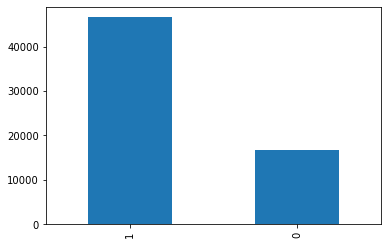

In [8]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

6. 인덱스를 재설정하시오(Hint. reset_index() 함수 사용).

In [8]:
review_df.reset_index(drop=True,inplace=True)

7. 앞의 10,000개 레코드만 선택하여 review_df에 다시 할당하시오.

In [9]:
review_df=review_df[:10000]

In [10]:
review_df

asin                        name  rating                date  \
0     B0000SX2UC                  Luke Wyatt       1     January 7, 2004   
1     B0000SX2UC                      Brooke       5   December 30, 2003   
2     B0000SX2UC               tristazbimmer       4     August 28, 2005   
3     B0000SX2UC                    J. White       4  September 25, 2005   
4     B0000SX2UC  the cell phone store owner       5      April 16, 2004   
...          ...                         ...     ...                 ...   
9995  B00JYR6GGM                     Johnson       2        May 17, 2017   
9996  B00JYR6GGM             Amazon Customer       5        July 1, 2018   
9997  B00JYR6GGM                        Joan       5   December 16, 2018   
9998  B00JYR6GGM             Amazon Customer       4       June 19, 2018   
9999  B00JYR6GGM                   Arlene R.       5       July 27, 2018   

      verified                                              title  \
0        False                        Text Messaging Doesn't Work   
1        False                                    Love This Phone   
2        False       Great phone service and options, lousy case!   
3        False                                Worked great for me   
4        False                Wanna cool Nokia? You have it here!   
...        ...                                                ...   
9995      True                   Dont buy a Verizon prepaid phone   
9996      True                                         Five Stars   
9997      True  It has voice command. My husband has MS so tha...   
9998      True                                         Four Stars   
9999      True                                         Five Stars   

                                                   body  helpfulVotes  \
0     Due to a software issue between Nokia and Spri...          17.0   
1     This is a great, reliable phone. I also purcha...           5.0   
2     The phone has been great for every purpose it ...           1.0   
3     Hello, I have this phone and used it until I d...           NaN   
4     Cool. Cheap. Color: 3 words that describe the ...           2.0   
...                                                 ...           ...   
9995  I'm not sure if the phone is any good or not, ...           3.0   
9996                                thes is what i need           NaN   
9997                                              Great           NaN   
9998         perfect size and simple to set up and use.           NaN   
9999                        good product. fast shipping           NaN   

                                                 body_n  sentiment  
0     ['due', 'software', 'issue', 'nokia', 'sprint'...          0  
1     ['great', 'reliable', 'phone', 'also', 'purcha...          1  
2     ['phone', 'great', 'every', 'purpose', 'offer'...          1  
3     ['hello', 'phone', 'used', 'decided', 'buy', '...          1  
4     ['cool', 'cheap', 'color', 'word', 'describe',...          1  
...                                                 ...        ...  
9995  ['sure', 'phone', 'good', 'never', 'used', 've...          0  
9996                                   ['thes', 'need']          1  
9997                                          ['great']          1  
9998        ['perfect', 'size', 'simple', 'set', 'use']          1  
9999            ['good', 'product', 'fast', 'shipping']          1  

[10000 rows x 10 columns]

8. 데이터를 전처리하시오.

In [11]:
import re

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['body'] = review_df['body'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

C:\Users\USER\AppData\Local\Temp/ipykernel_16492/1729010152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['body'] = review_df['body'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )


9. RNN 모형을 만들기 위한 텍스트 토큰화를 수행하시오.

10. 한 번만 출현하는 단어의 비율을 구하시오.

11. 전체 단어의 숫자를 구하시오.

12. 텍스트 길이의 분포를 히스토그램으로 그리시오.

13. 데이터를 패딩한 후에 훈련 데이터와 테스트 데이터로 나누시오.

14. SimpleRNN 모델을 만들고 성능을 평가하시오.

15. LSTM 모델을 만들고 성능을 평가하시오.